In [12]:
import pandas as pd 
import numpy as np
dataset = pd.read_csv("ai_job_dataset_uncleaned.csv")
dataset.head(5)

,job_title,salary_usd,salary_currency,expertperience_level,employment_type,company_location,comediumpany_smallize,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI Research Scientist,90376.0,USD,SE,CT,China,medium,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,10/18/2024,11/7/2024,1076.0,5.9,Smart Analytics
1,AI Software Engineer,61895.0,USD,EN,CT,Canada,medium,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,11/20/2024,1/11/2025,1268.0,5.2,TechCorp Inc
2,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,two,Education,3/18/2025,4/7/2025,1974.0,9.4,Autonomous Tech
3,NLP Engineer,80215.0,USD,SE,FL,India,medium,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,12/23/2024,2/24/2025,1345.0,8.6,Future Systems
4,AI Consultant,54624.0,EUR,EN,PT,France,small,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,4/15/2025,6/23/2025,1989.0,6.6,Advanced Robotics


## EDA

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37060 entries, 0 to 37059
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               37059 non-null  object 
 1   salary_usd              37047 non-null  float64
 2   salary_currency         37036 non-null  object 
 3   expertperience_level    37014 non-null  object 
 4   employment_type         37029 non-null  object 
 5   company_location        37036 non-null  object 
 6   comediumpany_smallize   37040 non-null  object 
 7   employee_residence      37045 non-null  object 
 8   remote_ratio            37043 non-null  object 
 9   required_skills         37059 non-null  object 
 10  education_required      37059 non-null  object 
 11  years_experience        37059 non-null  object 
 12  industry                37059 non-null  object 
 13  posting_date            37058 non-null  object 
 14  application_deadline    37059 non-null

In [15]:
dataset.shape

(37060, 18)

In [16]:
dataset.columns

Index(['job_title', 'salary_usd', 'salary_currency', 'expertperience_level',
       'employment_type', 'company_location', 'comediumpany_smallize',
       'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [17]:
dataset.isnull().sum()

job_title                  1
salary_usd                13
salary_currency           24
expertperience_level      46
employment_type           31
company_location          24
comediumpany_smallize     20
employee_residence        15
remote_ratio              17
required_skills            1
education_required         1
years_experience           1
industry                   1
posting_date               2
application_deadline       1
job_description_length     1
benefits_score             1
company_name               5
dtype: int64

In [18]:
dataset.dropna(inplace=True)
dataset.shape

(36937, 18)

In [19]:
dataset.isnull().sum()

job_title                 0
salary_usd                0
salary_currency           0
expertperience_level      0
employment_type           0
company_location          0
comediumpany_smallize     0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [20]:
dataset.describe()

,salary_usd,job_description_length
count,36937.000000,36937.000000
mean,118823.423803,1500.688442
std,62385.660687,574.581168
min,16621.000000,500.000000
25%,72559.000000,1002.000000
50%,103167.000000,1511.000000
75%,151161.000000,1996.000000
max,410273.000000,2499.000000


### Renaming the column name

In [21]:
dataset = dataset.rename(columns={'comediumpany_smallize': 'company_size'})
dataset = dataset.rename(columns={'expertperience_level': 'experience_level'})

### Replacing the value

In [22]:
dataset['company_size'] = dataset['company_size'].replace('expert', 'EX')

In [23]:
dataset['company_size'] = dataset['company_size'].replace('medium', 'M')
dataset['company_size'] = dataset['company_size'].replace('small', 'S')


In [24]:
dataset['years_experience'] = dataset['years_experience'].replace('two',2)

In [25]:
dataset['years_experience'] = dataset['years_experience'].replace('five',5)

In [26]:
dataset.shape

(36937, 18)

### Dropping duplicate values

In [27]:
dataset.drop_duplicates(inplace=True)


In [28]:
dataset.shape

(30000, 18)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               30000 non-null  object 
 1   salary_usd              30000 non-null  float64
 2   salary_currency         30000 non-null  object 
 3   experience_level        30000 non-null  object 
 4   employment_type         30000 non-null  object 
 5   company_location        30000 non-null  object 
 6   company_size            30000 non-null  object 
 7   employee_residence      30000 non-null  object 
 8   remote_ratio            30000 non-null  object 
 9   required_skills         30000 non-null  object 
 10  education_required      30000 non-null  object 
 11  years_experience        30000 non-null  object 
 12  industry                30000 non-null  object 
 13  posting_date            30000 non-null  object 
 14  application_deadline    30000 non-null  obj

In [ ]:
# dataset.to_csv('ai_job_dataset.csv')

In [30]:
df = pd.read_csv('ai_job_dataset.csv')
df.head(2)

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,10/18/2024,11/7/2024,1076,5.9,Smart Analytics
1,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,11/20/2024,1/11/2025,1268,5.2,TechCorp Inc


In [31]:
df.nunique()

job_title                    20
salary_usd                27548
salary_currency               8
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           50
remote_ratio                  3
required_skills           25702
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64

In [32]:
columns_list = ['job_title','experience_level','employment_type','company_location',
                'company_size','employee_residence','remote_ratio','education_required',
                'years_experience','industry','company_name']

for col in columns_list:
    print(col)
    print(df[col].unique())

job_title
['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']
experience_level
['SE' 'EN' 'MI' 'EX']
employment_type
['CT' 'FL' 'PT' 'FT']
company_location
['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan']
company_size
['M' 'L' 'S']
employee_residence
['China' 'Ireland' 'South Korea' 'India' 'Singapore' 'Germany'
 'United Kingdom' 'France' 'Austria' 'Sweden' 'Norway' 'Israel'
 'United States' 'Netherlands' 'Denmark' 'Switzerland' 'Finland' 'Japan'
 '

In [48]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,118670.451700,49.840000,6.309433,1502.083667,7.501907
std,62229.977054,40.829278,5.572413,575.418018,1.447517
min,16621.000000,0.000000,0.000000,500.000000,5.000000
25%,72575.750000,0.000000,2.000000,1001.000000,6.300000
50%,103206.500000,50.000000,5.000000,1512.000000,7.500000
75%,150921.750000,100.000000,10.000000,1997.000000,8.800000
max,410273.000000,100.000000,19.000000,2499.000000,10.000000


### After performing EDA Created Two new features and repeated the EDA process

In [49]:
df["log_salary"] = np.log1p(df["salary_usd"])
df["num_required_skills"] = df["required_skills"].apply(
    lambda x: len([s.strip() for s in x.split(",") if s.strip()])
)

## Numerical Features Analysis


Distributions for Numerical Features:


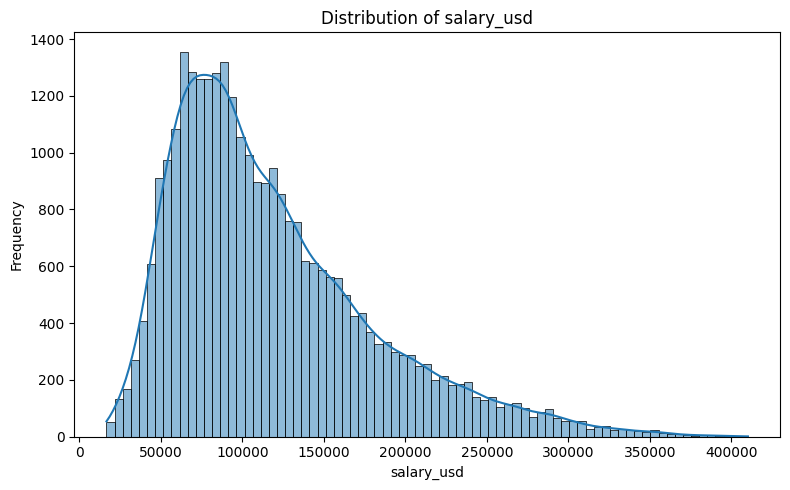

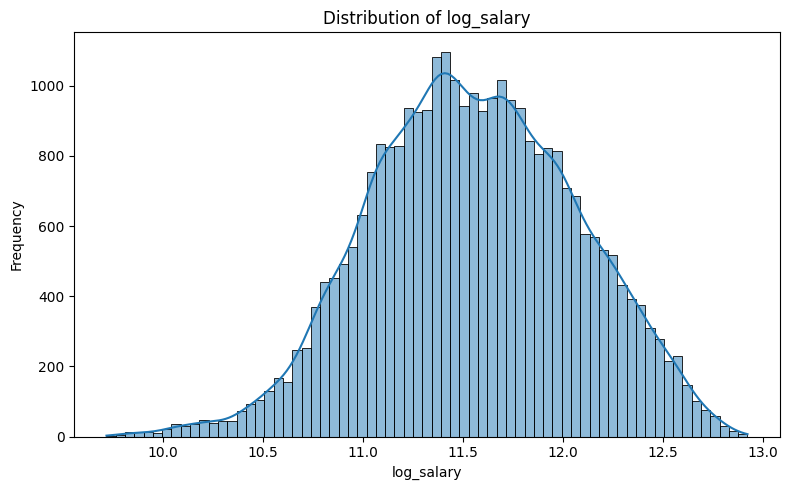

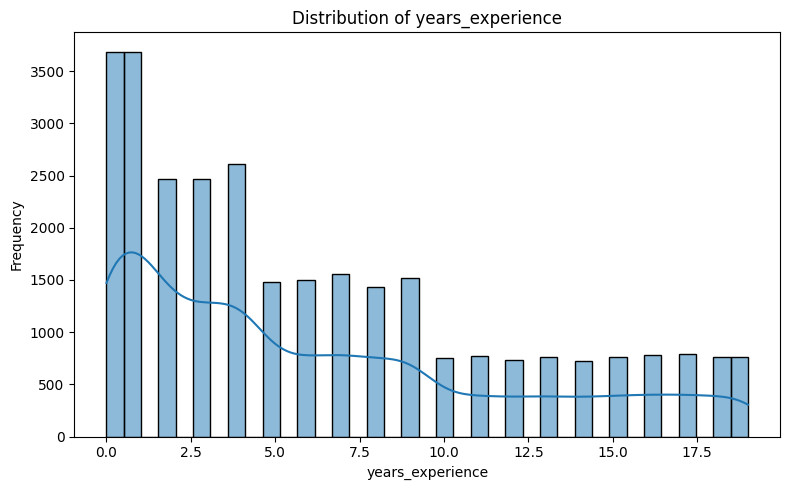

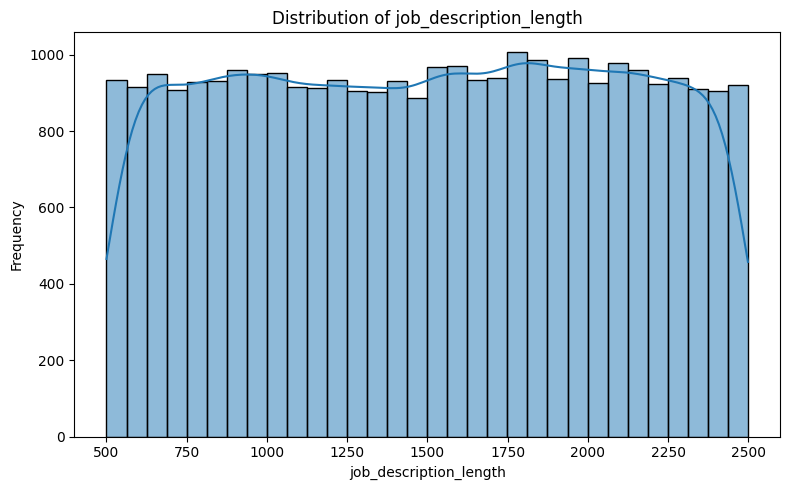

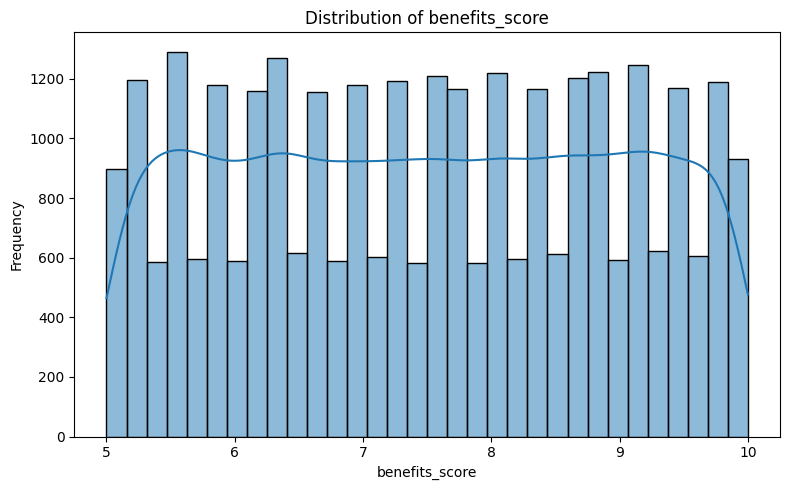

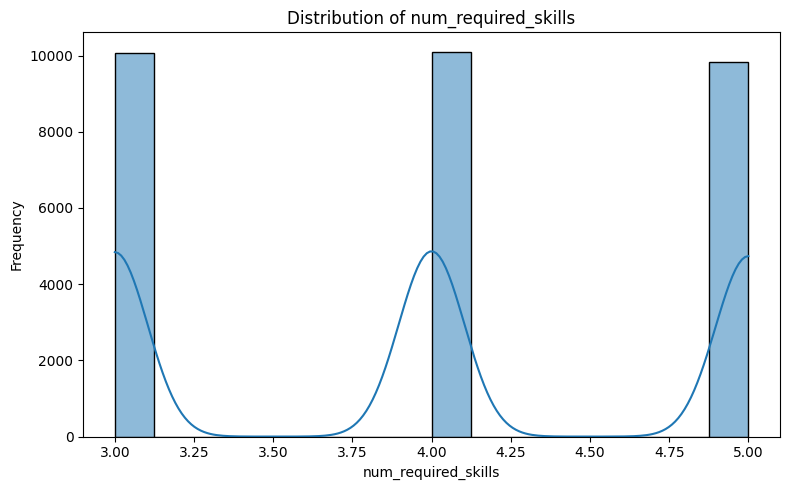

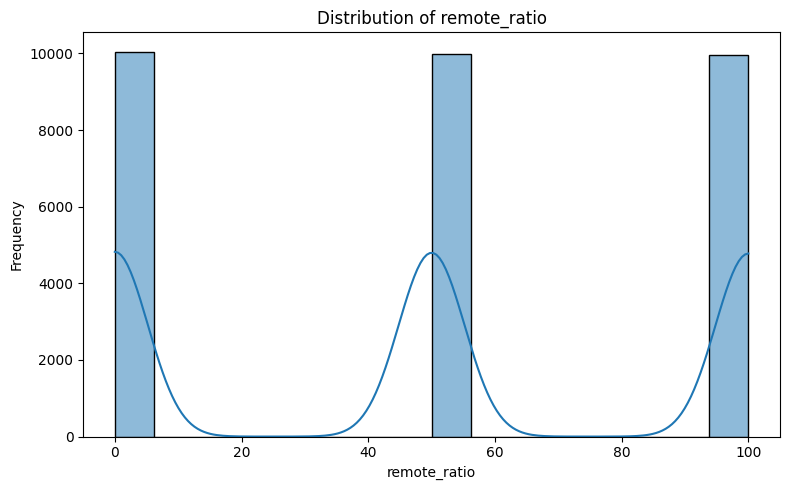

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = [
    'salary_usd',
    'log_salary',
    'years_experience',
    'job_description_length',
    'benefits_score',
    'num_required_skills',
    'remote_ratio'
]

print("\nDistributions for Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


### The salary is right skewed. for regression data needs to be symmetric for better results. so need to convert it into log_salary.
### -> It will help reduce the outliers as well.
### -> It makes relationships more linear.
### -> It improves regression model performance.

## Categorical Features Analysis


Value Counts for Categorical Features:


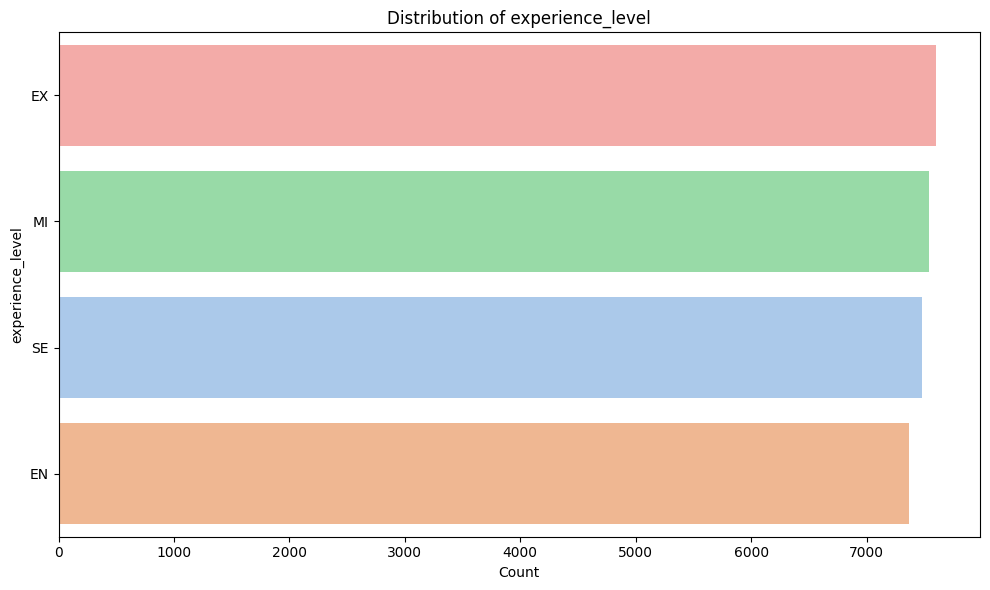

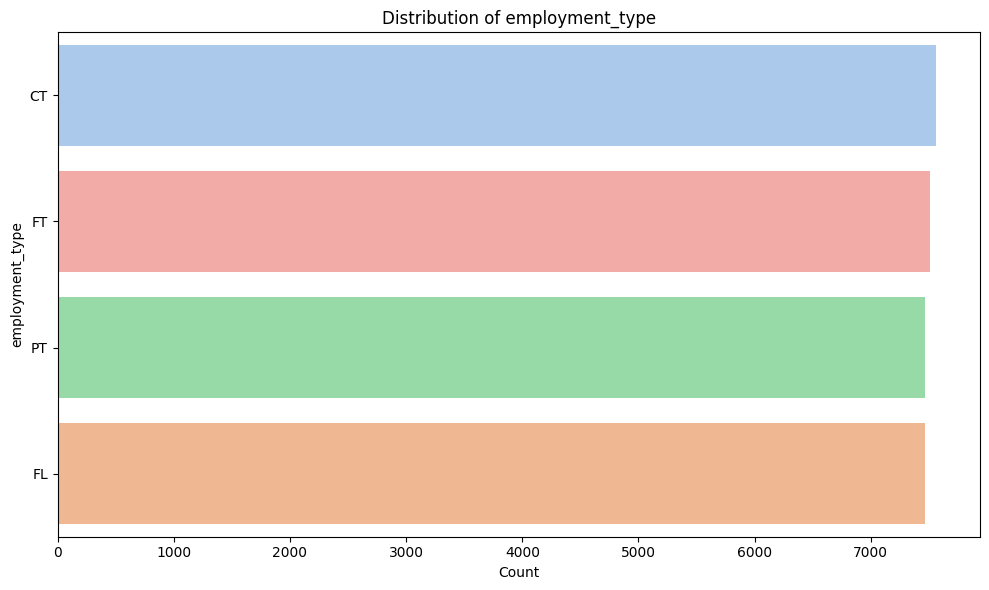

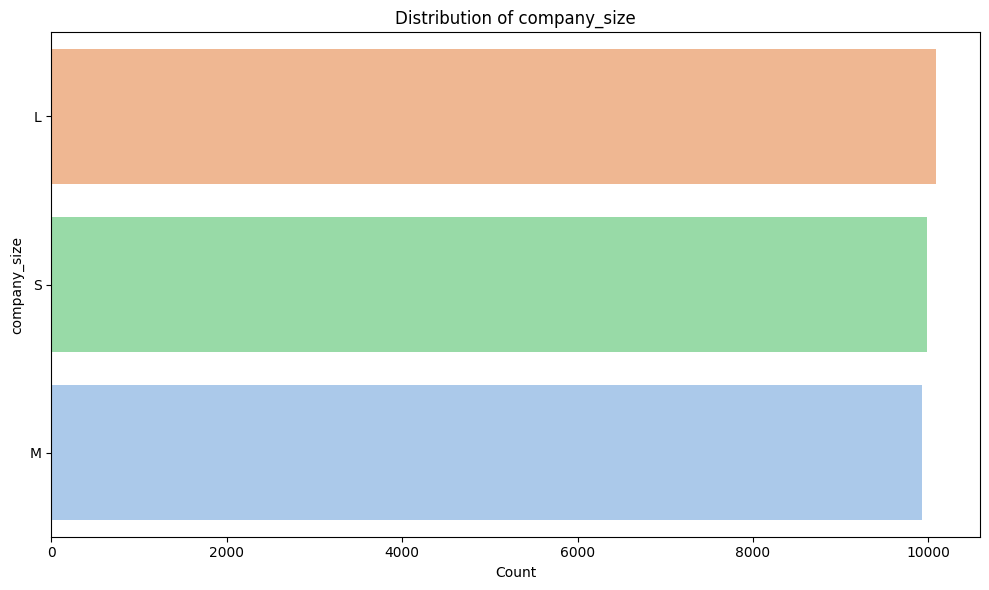

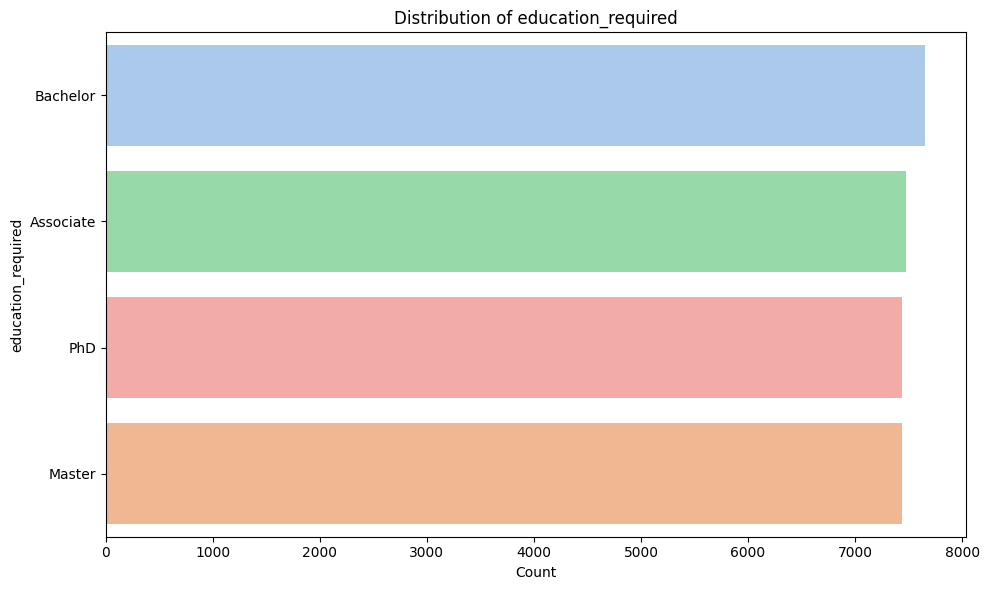

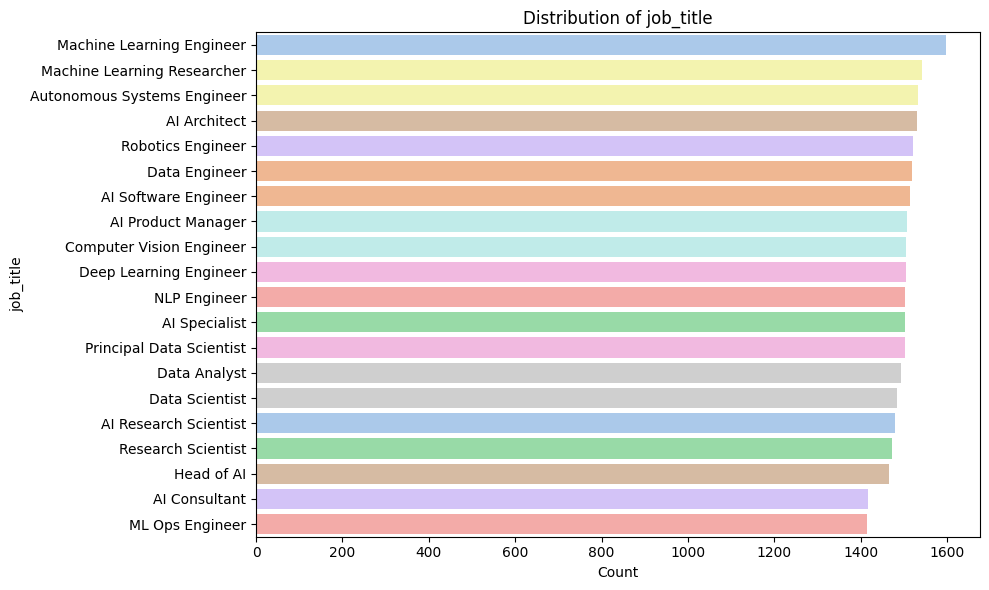

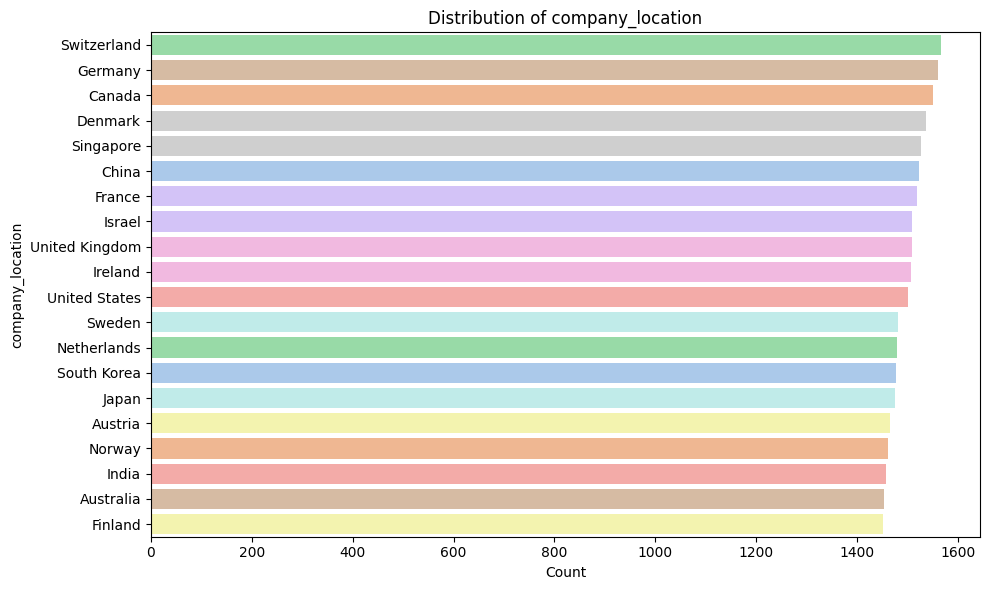

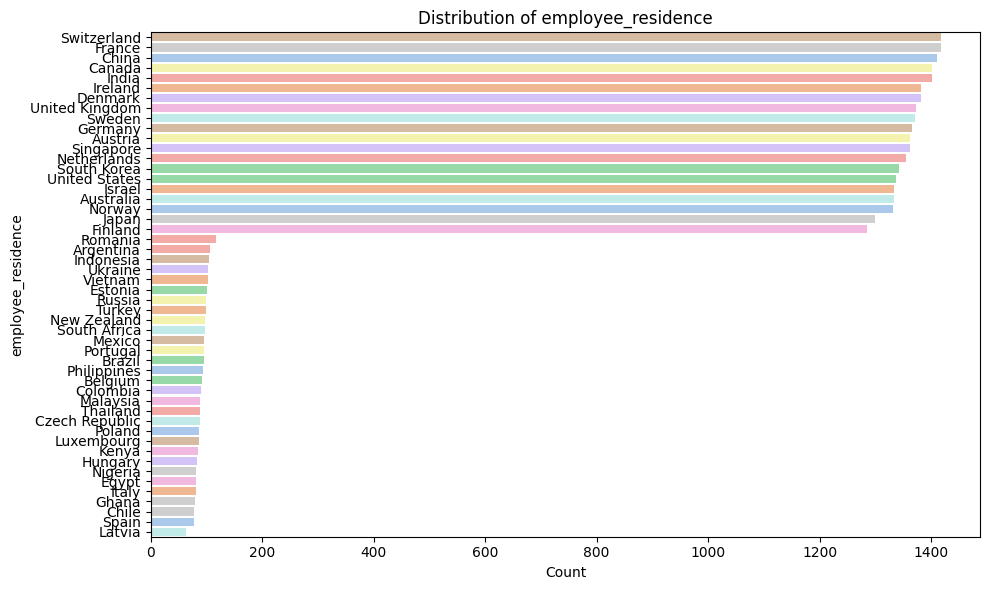

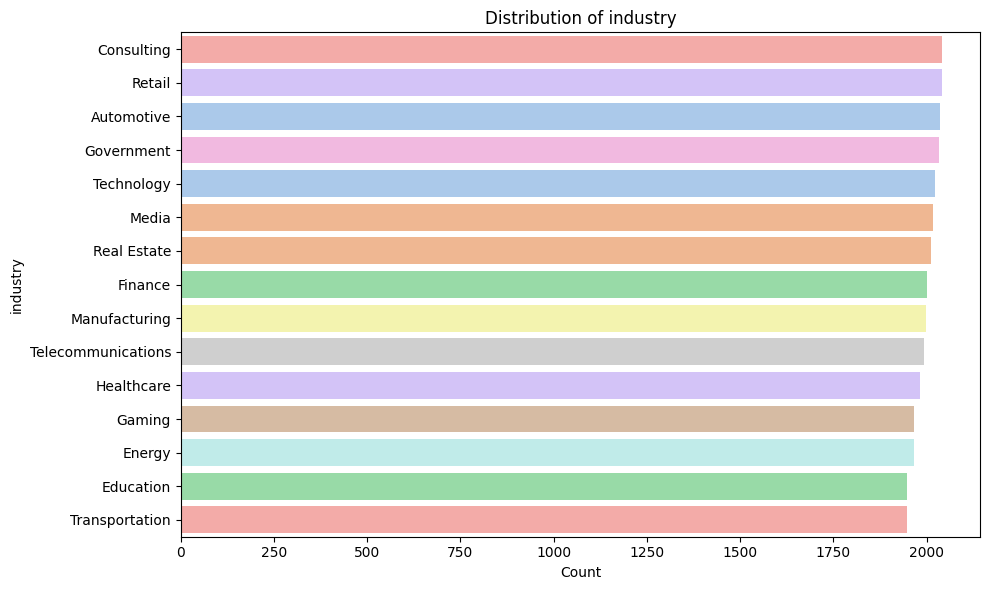

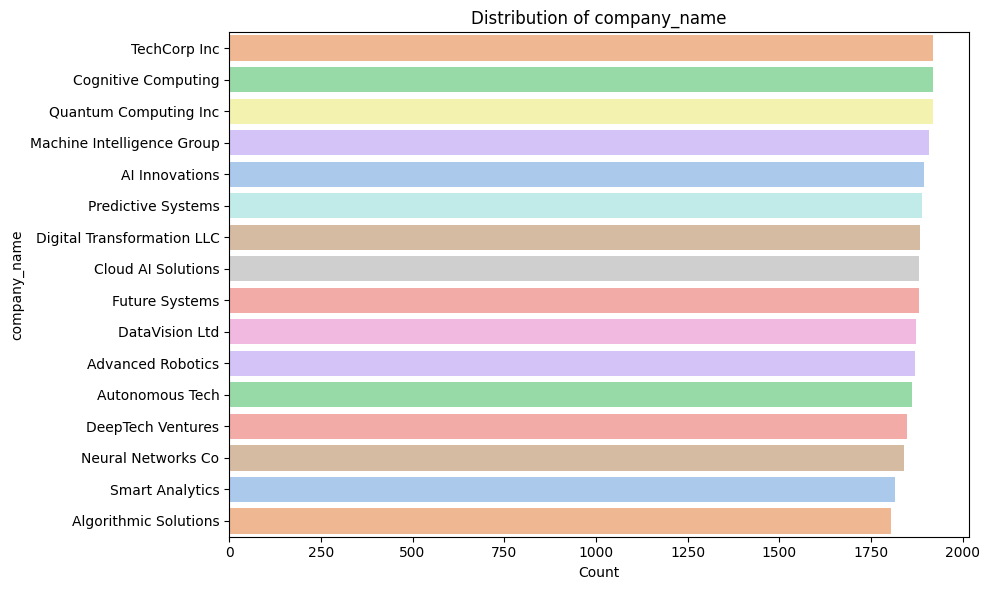

In [51]:
categorical_cols = [
    'experience_level',
    'employment_type',
    'company_size',
    'education_required',
    'job_title',
    'company_location',
    'employee_residence', 
    'industry', 
    'company_name' 
]

print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=col,               
        palette='pastel',     
        legend=False           
    )

    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Correlation Analysis

<Axes: >

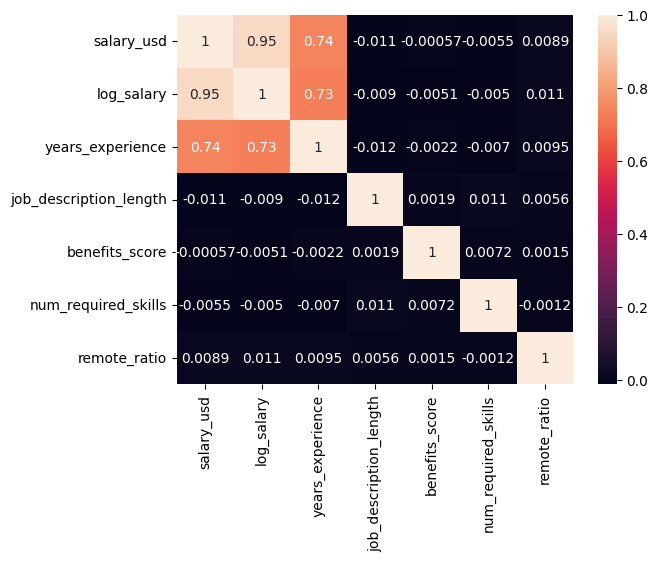

In [52]:
num_df = df[numerical_cols]
sns.heatmap(num_df.corr(),annot=True)